In [1]:
# export full genome
from pybedtools import genome_registry, chromsizes_to_file, chromsizes
chromsizes_to_file(chromsizes('hg19'), '../download/genome/hg19.genome')

'../download/genome/hg19.genome'

In [2]:
assembly_path = "../download/genome/hg19_reduced.genome"

In [3]:
import pandas as pd
import numpy as np
from pybedtools import BedTool

In [4]:
tests_df = pd.read_hdf("../storage/encode_repeatmasker_stats.hdf", "null_model_hg19_DNase_H3K27ac_tissue_SINE_MIR")

In [5]:
results_df = tests_df[['sample', 'intersections', 'p1', 'p2', 'p3']]

In [6]:
results_df['enhancers'] = 0
results_df['repeats'] = 0
results_df

/Users/manuel/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/manuel/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,sample,intersections,p1,p2,p3,enhancers,repeats
0,adrenal gland,21864.0,0.000000e+00,0.000000e+00,0.000000e+00,0,0
1,stomach,8839.0,1.020840e-122,1.519858e-147,1.390602e-169,0,0
2,placenta,19280.0,0.000000e+00,0.000000e+00,0.000000e+00,0,0
3,thymus,13151.0,2.641518e-188,1.375759e-280,1.725723e-247,0,0
4,stomach,18830.0,0.000000e+00,0.000000e+00,0.000000e+00,0,0
5,large intestine,21619.0,0.000000e+00,0.000000e+00,0.000000e+00,0,0
6,pancreas,6770.0,3.724941e-63,4.914364e-109,1.733619e-93,0,0
7,psoas muscle,10113.0,4.723251e-190,7.731382e-218,1.177415e-184,0,0
8,female gonad,8503.0,2.800396e-111,4.266652e-162,2.361600e-138,0,0
9,muscle of leg,16531.0,2.159870e-206,0.000000e+00,4.402079e-234,0,0


In [8]:
results_df[['sample', 'enhancers', 'repeats', 'intersections', 'p1', 'p2', 'p3']]

,sample,enhancers,repeats,intersections,p1,p2,p3
0,adrenal gland,0,0,21864.0,0.000000e+00,0.000000e+00,0.000000e+00
1,stomach,0,0,8839.0,1.020840e-122,1.519858e-147,1.390602e-169
2,placenta,0,0,19280.0,0.000000e+00,0.000000e+00,0.000000e+00
3,thymus,0,0,13151.0,2.641518e-188,1.375759e-280,1.725723e-247
4,stomach,0,0,18830.0,0.000000e+00,0.000000e+00,0.000000e+00
5,large intestine,0,0,21619.0,0.000000e+00,0.000000e+00,0.000000e+00
6,pancreas,0,0,6770.0,3.724941e-63,4.914364e-109,1.733619e-93
7,psoas muscle,0,0,10113.0,4.723251e-190,7.731382e-218,1.177415e-184
8,female gonad,0,0,8503.0,2.800396e-111,4.266652e-162,2.361600e-138
9,muscle of leg,0,0,16531.0,2.159870e-206,0.000000e+00,4.402079e-234


In [9]:
store = pd.HDFStore("../storage/encode_overlaps.hdf")
store_repeat = pd.HDFStore("../storage/repeatmasker_staging.hdf")

In [10]:
store.keys()

['/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped',
 '/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped_bed']

In [11]:
store_repeat.keys()

['/DNA',
 '/DNA_Kolobok',
 '/DNA_Kolobok_bed',
 '/DNA_MULE_MuDR',
 '/DNA_MULE_MuDR_bed',
 '/DNA_Merlin',
 '/DNA_Merlin_bed',
 '/DNA_PIF_Harbinger',
 '/DNA_PIF_Harbinger_bed',
 '/DNA_PiggyBac',
 '/DNA_PiggyBac_bed',
 '/DNA_TcMar',
 '/DNA_TcMar_Mariner',
 '/DNA_TcMar_Mariner_bed',
 '/DNA_TcMar_Pogo',
 '/DNA_TcMar_Pogo_bed',
 '/DNA_TcMar_Tc1',
 '/DNA_TcMar_Tc1_bed',
 '/DNA_TcMar_Tc2',
 '/DNA_TcMar_Tc2_bed',
 '/DNA_TcMar_Tigger',
 '/DNA_TcMar_Tigger_bed',
 '/DNA_TcMar_bed',
 '/DNA_TcMar_qm',
 '/DNA_TcMar_qm_bed',
 '/DNA_bed',
 '/DNA_hAT',
 '/DNA_hAT_Ac',
 '/DNA_hAT_Ac_bed',
 '/DNA_hAT_Blackjack',
 '/DNA_hAT_Blackjack_bed',
 '/DNA_hAT_Charlie',
 '/DNA_hAT_Charlie_bed',
 '/DNA_hAT_Tag1',
 '/DNA_hAT_Tag1_bed',
 '/DNA_hAT_Tip100',
 '/DNA_hAT_Tip100_bed',
 '/DNA_hAT_Tip100_qm',
 '/DNA_hAT_Tip100_qm_bed',
 '/DNA_hAT_bed',
 '/DNA_hAT_qm',
 '/DNA_hAT_qm_bed',
 '/DNA_qm',
 '/DNA_qm_PiggyBac_qm',
 '/DNA_qm_PiggyBac_qm_bed',
 '/DNA_qm_bed',
 '/DNA_qm_hAT_Tip100_qm',
 '/DNA_qm_hAT_Tip100_qm_bed',
 '/L

In [12]:
store.close()
store_repeat.close()

In [13]:
encode_metadata = pd.read_hdf("../storage/encode_staging.hdf", "encode_metadata")

In [14]:
encode_tissues = encode_metadata.query("assembly == 'hg19' & biosample_type=='tissue' & method=='DNase_H3K27ac'")

In [15]:
def compare_null_model(counts, real_count, plot=True):
    import scipy.stats as st
    print("mean:", np.mean(counts), "std:", np.std(counts))
    if plot:
        import seaborn as sns
        %matplotlib inline

        sns.distplot(counts, kde=False, fit=st.norm, bins=20)
    z_score =(real_count - np.mean(counts))/np.std(counts)
    p_values = st.norm.sf(abs(z_score))
    print(z_score, p_values)
    return z_score, p_values

In [16]:
def build_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(bed_overlap_with, F=1)
    return core_null_model_intersection.count()

In [17]:
def build_shuffled_full_overlap_with(bed, bed_overlap_with, assembly_path):
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

In [18]:
def build_shuffled_on_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

In [33]:
from joblib import Parallel, delayed
import multiprocessing

num_cores = multiprocessing.cpu_count()
repeat_bed_df = pd.read_hdf("../storage/repeatmasker_staging.hdf", "SINE_Alu_bed")

test_columns = ['sample', 'enhancers', 'repeats', 'intersections', 'z1', 'z2', 'z3', 'p1', 'p2', 'p3']

tests_df = pd.DataFrame(columns=test_columns)

idx = 0

for index, row in encode_tissues.iterrows():
    encode_bed = BedTool(row['bed_filepath'])
    encode_bed_df = encode_bed.to_dataframe()
    
    print(row['biosample_term_name'])

    repeat_bed = BedTool().from_dataframe(repeat_bed_df)
    
    # removing chroms
    chroms = encode_bed_df['chrom'].unique()
    repeat_bed = BedTool().from_dataframe(repeat_bed_df.query('chrom in @chroms'))
    
    encode_count = encode_bed.count()
    repeat_count = repeat_bed.count()
    
    results_df.set_value(idx, 'enhancers', encode_count)
    results_df.set_value(idx, 'repeats', repeat_count)
    idx = idx + 1
    
    
    print("enhancers:", encode_count, ", repeats:", repeat_count)

    real_count = encode_bed.intersect(repeat_bed, F=1).count()
    print("Intersections:", real_count)
    print(" ")
    print("Null Model 1")
    counts = []
    counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 50)))
    z_score1, pvalue1 = compare_null_model(counts, real_count, False)
    
    print(" ")
    print("Null Model 2")
    counts = []
    counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap_with)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 50)))
    z_score2, pvalue2 = compare_null_model(counts, real_count, False)
    print(" ")
    print("Null Model 3")
    counts = []
    counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_on_shuffled_full_overlap)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 50)))
    z_score3, pvalue3 = compare_null_model(counts, real_count, False)
    
    row_array = [row['biosample_term_name'], encode_count, repeat_count, real_count, z_score1, z_score2, z_score3, pvalue1, pvalue2, pvalue3]
    
    temp_df = pd.DataFrame([row_array], columns=test_columns)
    tests_df = tests_df.append(temp_df)
    
    print(" ")
    print(" ")
    
    

adrenal gland
stomach
placenta
thymus
stomach
large intestine
pancreas
psoas muscle
female gonad
muscle of leg
small intestine
muscle of trunk
small intestine


In [38]:
tests_df.reset_index(inplace=True, drop=True)

In [42]:
tests_df.to_hdf("../storage/encode_repeatmasker_stats.hdf", "null_model_hg19_DNase_H3K27ac_tissue_SINE_MIR")

In [ ]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

## Counting occurences per enhancer

In [34]:
from joblib import Parallel, delayed
import multiprocessing

num_cores = multiprocessing.cpu_count()
repeat_bed_df = pd.read_hdf("../storage/repeatmasker_staging.hdf", "SINE_MIR_bed")

test_columns = ['bin', 'occ', 'occ_null_1', 'occ_null_2', 'occ_null_3', 'sample']

tests_occurences_df = pd.DataFrame(columns=test_columns)

idx = 0

for index, row in encode_tissues.iterrows():
    encode_bed = BedTool(row['bed_filepath'])
    encode_bed_df = encode_bed.to_dataframe()
    
    print(row['biosample_term_name'])

    repeat_bed = BedTool().from_dataframe(repeat_bed_df)
    
    # removing chroms
    chroms = encode_bed_df['chrom'].unique()
    repeat_bed = BedTool().from_dataframe(repeat_bed_df.query('chrom in @chroms'))
    
    encode_bed = BedTool().from_dataframe(
    encode_bed_df[['chrom', 'start', 'end', 'name', 'score', 'strand']])
    
    overlap_occurences_df = encode_bed.intersect(repeat_bed, F=1, c=True).to_dataframe()
    overlap_occurences_null_df = encode_bed.shuffle(g=assembly_path).intersect(repeat_bed, F=1, c=True).to_dataframe()
    overlap_occurences_null_2_df = encode_bed.intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
    overlap_occurences_null_3_df = encode_bed.shuffle(g=assembly_path).intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
    
    occ_cols = ['chrom', 'start', 'end', 'name', 'score', 'strand', 'occurences']
    overlap_occurences_df.columns = occ_cols
    overlap_occurences_null_df.columns = occ_cols
    overlap_occurences_null_2_df.columns = occ_cols
    overlap_occurences_null_3_df.columns = occ_cols
    
    occurences = overlap_occurences_df.query("occurences > 0")['occurences'].tolist()
    occurences_null = overlap_occurences_null_df.query("occurences > 0")['occurences'].tolist()
    occurences_null_2 = overlap_occurences_null_2_df.query("occurences > 0")['occurences'].tolist()
    occurences_null_3 = overlap_occurences_null_3_df.query("occurences > 0")['occurences'].tolist()
    
    occ_freq, occ_base = np.histogram(occurences, bins=np.arange(1, 30, 1))
    occ_freq_null, _ = np.histogram(occurences_null, bins=np.arange(1, 30, 1))
    occ_freq_null_2, _ = np.histogram(occurences_null_2, bins=np.arange(1, 30, 1))
    occ_freq_null_3, _ = np.histogram(occurences_null_3, bins=np.arange(1, 30, 1))
    
    temp_df = pd.DataFrame(columns=test_columns)
    temp_df['bin'] = pd.Series(occ_base[:-1])
    temp_df['occ'] = pd.Series(occ_freq)
    temp_df['occ_null_1'] = pd.Series(occ_freq_null)
    temp_df['occ_null_2'] = pd.Series(occ_freq_null_2)
    temp_df['occ_null_3'] = pd.Series(occ_freq_null_3)
    
    temp_df['sample'] = row['biosample_term_name']
    
    tests_occurences_df = tests_occurences_df.append(temp_df)
   

adrenal gland
stomach
placenta
thymus
stomach
large intestine
pancreas
psoas muscle
female gonad
muscle of leg
small intestine
muscle of trunk
small intestine


In [20]:
tests_occurences_df.reset_index(inplace=True, drop=True)

In [21]:
tests_occurences_df.head()

,bin,occ,occ_null_1,occ_null_2,occ_null_3,sample
0,1.0,6847.0,7666.0,10074.0,10302.0,adrenal gland
1,2.0,2547.0,3047.0,3979.0,3842.0,adrenal gland
2,3.0,1042.0,1317.0,1398.0,1421.0,adrenal gland
3,4.0,500.0,695.0,503.0,517.0,adrenal gland
4,5.0,243.0,329.0,208.0,183.0,adrenal gland


In [35]:
mir_df = tests_occurences_df.copy()

In [33]:
alu_df = tests_occurences_df.copy()

In [38]:
mir_df.loc[mir_df['occ'] < 1, 'occ'] = 0
alu_df.loc[alu_df['occ'] < 1, 'occ'] = 0

In [23]:
prova_df.loc[prova_df['occ'] < 1, 'occ'] = 0
prova_df.loc[prova_df['occ_null_1'] < 1, 'occ_null_1'] = 0
prova_df.loc[prova_df['occ_null_2'] < 1, 'occ_null_2'] = 0
prova_df.loc[prova_df['occ_null_3'] < 1, 'occ_null_3'] = 0

In [24]:
#normalized_occ_df = tests_occurences_df.copy()
#normalized_occ_df['occ'] = tests_occurences_df['occ'] / np.sum(tests_occurences_df['occ'])
#normalized_occ_df['occ_null_1'] = tests_occurences_df['occ_null_1'] / np.sum(tests_occurences_df['occ_null_1'])
#normalized_occ_df['occ_null_2'] = tests_occurences_df['occ_null_2'] / np.sum(tests_occurences_df['occ_null_2'])
#normalized_occ_df['occ_null_3'] = tests_occurences_df['occ_null_3'] / np.sum(tests_occurences_df['occ_null_3'])

In [25]:
grouped_df = prova_df.query('occ > 0').groupby('bin')[
    'occ', 'occ_null_1', 'occ_null_2', 'occ_null_3'
].mean()

In [28]:
grouped_df.loc[grouped_df['occ'] < 1, 'occ'] = 0
grouped_df.loc[grouped_df['occ_null_1'] < 1, 'occ_null_1'] = 0
grouped_df.loc[grouped_df['occ_null_2'] < 1, 'occ_null_2'] = 0
grouped_df.loc[grouped_df['occ_null_3'] < 1, 'occ_null_3'] = 0

In [29]:
grouped_df.reset_index(inplace=True)

In [237]:
prova_df.query('occ > 0').groupby('bin')[
    'occ', 'occ_null_1', 'occ_null_2', 'occ_null_3'
].aggregate([np.mean, np.std])

occ                occ_null_1                occ_null_2  \
             mean          std         mean          std         mean   
bin                                                                     
1.0   5970.615385  1528.699531  4713.538462  1024.696265  6295.615385   
2.0   1946.153846   705.783471  1456.076923   446.051092  1367.615385   
3.0    697.538462   309.238208   468.846154   179.687621   298.307692   
4.0    278.538462   132.011120   170.230769    76.736729    70.615385   
5.0    127.923077    71.024012    64.076923    36.766066    22.076923   
6.0     66.230769    40.311607    28.076923    16.106218     6.615385   
7.0     38.153846    21.605733    14.769231     8.795395     1.692308   
8.0     20.692308    13.942648     5.692308     4.625736     1.000000   
9.0     11.923077     8.470159     4.000000     3.162278     0.538462   
10.0     7.909091     4.300106     2.363636     2.292280     0.363636   
11.0     5.416667     4.273775     1.250000     1.215431     0.083333   
12.0     3.916667     3.396745     0.583333     0.996205     0.000000   
13.0     4.444444     2.877113     0.444444     1.013794     0.111111   
14.0     2.700000     1.828782     0.500000     0.707107     0.000000   
15.0     2.833333     2.136976     0.166667     0.408248     0.000000   
16.0     2.000000     1.154701     0.142857     0.377964     0.000000   
17.0     1.833333     1.602082     0.166667     0.408248     0.000000   
18.0     1.666667     1.154701     0.000000     0.000000     0.000000   
19.0     2.000000     1.414214     1.000000     0.000000     0.000000   
20.0     1.500000     0.707107     0.000000     0.000000     0.000000   
21.0     1.000000     0.000000     0.000000     0.000000     0.000000   
22.0     1.000000     0.000000     0.000000     0.000000     0.000000   
23.0     1.000000     0.000000     0.000000     0.000000     0.000000   
24.0     1.000000     0.000000     0.000000     0.000000     0.000000   
25.0     1.000000     0.000000     0.200000     0.447214     0.000000   
26.0     1.000000     0.000000     0.000000     0.000000     0.000000   
27.0     1.000000     0.000000     0.000000     0.000000     0.000000   
28.0     1.000000     0.000000     0.000000     0.000000     0.000000   

                    occ_null_3               
              std         mean          std  
bin                                          
1.0   1528.402354  6304.461538  1490.735312  
2.0    491.072727  1364.461538   499.577424  
3.0    145.039296   293.076923   138.025035  
4.0     40.248268    73.461538    47.255715  
5.0     16.680635    21.000000    13.753787  
6.0      4.574175     5.461538     4.274252  
7.0      1.601282     1.846154     2.230327  
8.0      1.224745     1.000000     1.224745  
9.0      0.967418     0.230769     0.438529  
10.0     0.674200     0.272727     0.646670  
11.0     0.288675     0.166667     0.389249  
12.0     0.000000     0.000000     0.000000  
13.0     0.333333     0.222222     0.440959  
14.0     0.000000     0.100000     0.316228  
15.0     0.000000     0.000000     0.000000  
16.0     0.000000     0.000000     0.000000  
17.0     0.000000     0.000000     0.000000  
18.0     0.000000     0.000000     0.000000  
19.0     0.000000     0.500000     0.707107  
20.0     0.000000     0.000000     0.000000  
21.0     0.000000     0.000000     0.000000  
22.0     0.000000     0.000000     0.000000  
23.0     0.000000     0.000000     0.000000  
24.0     0.000000     0.000000     0.000000  
25.0     0.000000     0.000000     0.000000  
26.0     0.000000     0.000000     0.000000  
27.0     0.000000     0.000000     0.000000  
28.0     0.000000     0.000000     0.000000

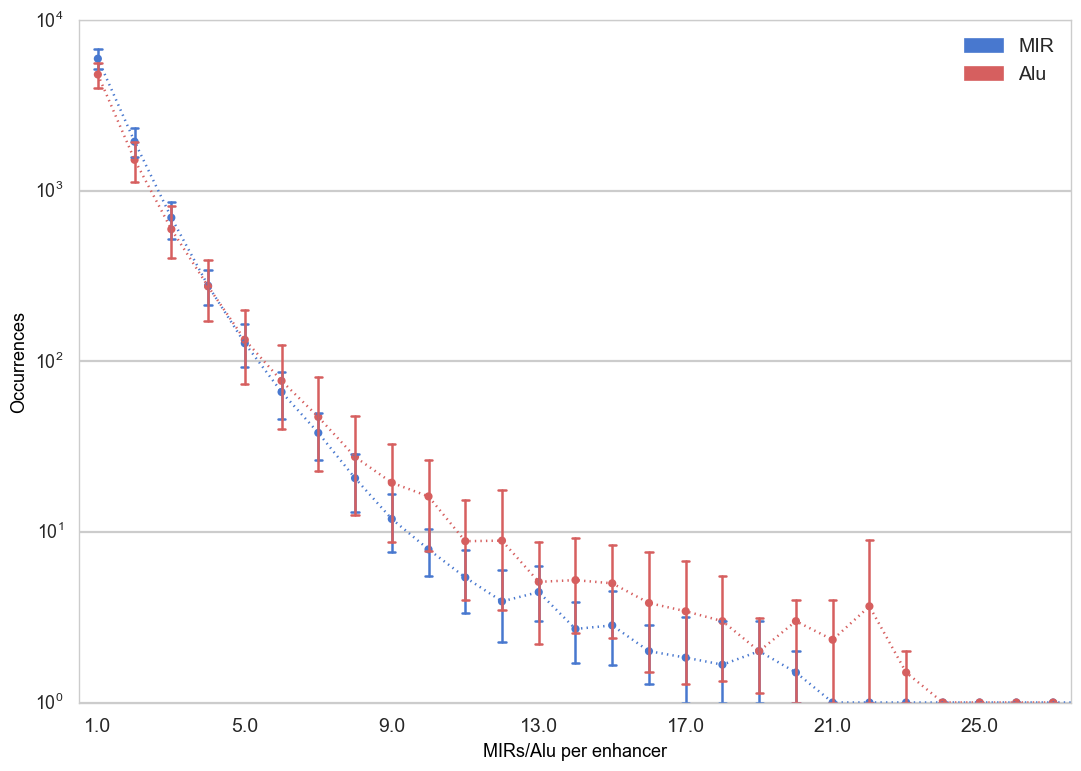

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
colors = sns.color_palette('muted').as_hex()[:10]

sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
ax = sns.pointplot(x="bin", y="occ", data=mir_df.query("occ > 0"),
                   capsize=.2, size=6, aspect=1, linestyles=[":"], color=colors[0], ci=95, estimator=np.mean)
sns.pointplot(x="bin", y="occ", data=alu_df.query("occ > 0"),
                   capsize=.2, size=6, aspect=1, linestyles=[":"], color=colors[2], ci=95, estimator=np.mean)

ax.axes.set_xlabel("MIRs/Alu per enhancer",size = 13,color="black",alpha=1)
ax.axes.set_ylabel("Occurrences",size = 13,color="black",alpha=1)
ax.axes.set_xticklabels(labels=ax.axes.get_xticklabels(),rotation=0, size=14)

ax.axes.set_yscale('log')

#ax.axes.set_xlim(0, 17)
#ax.axes.set_ylim(-1000,)

for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

p = mpatches.Patch(color=colors[0], label='MIR')
p1 = mpatches.Patch(color=colors[2], label='Alu')


plt.legend(handles=[p, p1], fontsize=14, loc=1)
plt.show()

/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


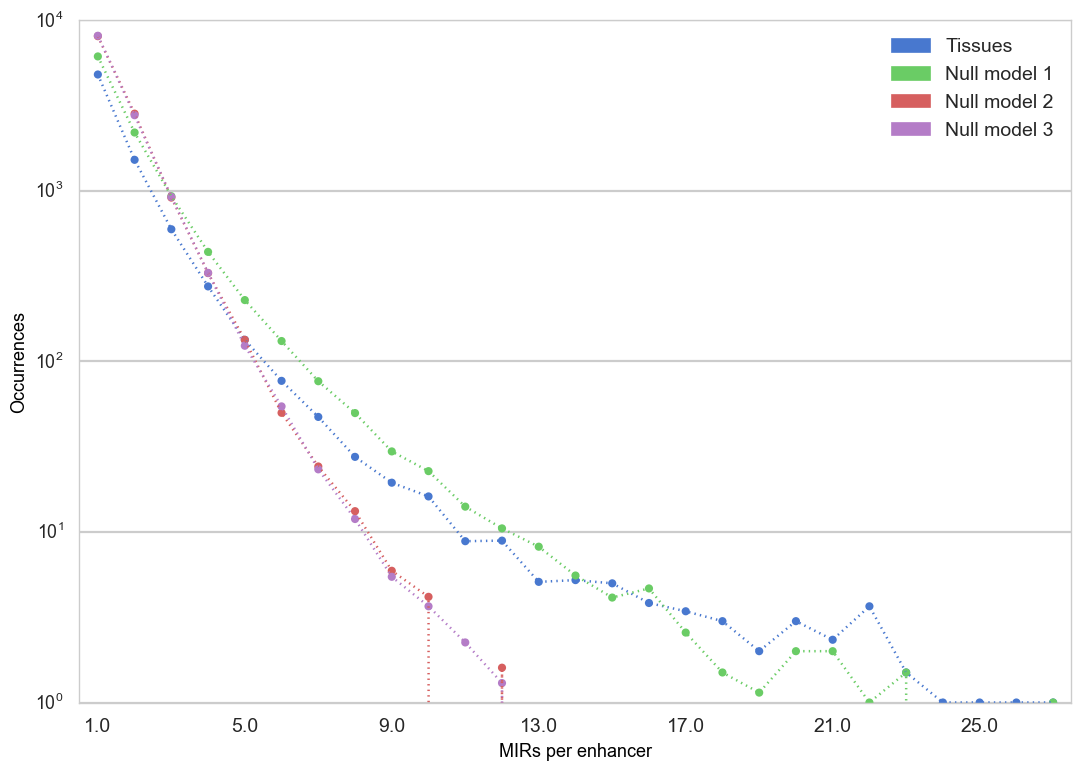

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
colors = sns.color_palette('muted').as_hex()[:10]

sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
ax = sns.pointplot(x="bin", y="occ", data=grouped_df,
                   capsize=.2, size=6, aspect=1, linestyles=[":"], color=colors[0])
sns.pointplot(x="bin", y="occ_null_1", data=grouped_df,
                   capsize=.2, size=6, aspect=1, linestyles=[":"], color=colors[1])
sns.pointplot(x="bin", y="occ_null_2", data=grouped_df,
                   capsize=.2, size=6, aspect=1, linestyles=[":"], color=colors[2])
sns.pointplot(x="bin", y="occ_null_3", data=grouped_df,
                   capsize=.2, size=6, aspect=1, linestyles=[":"], color=colors[3])

ax.axes.set_xlabel("MIRs per enhancer",size = 13,color="black",alpha=1)
ax.axes.set_ylabel("Occurrences",size = 13,color="black",alpha=1)
ax.axes.set_xticklabels(labels=ax.axes.get_xticklabels(),rotation=0, size=14)

ax.axes.set_yscale('log')

#ax.axes.set_xlim(0, 17)
#ax.axes.set_ylim(1,)

for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

p = mpatches.Patch(color=colors[0], label='Tissues')
p1 = mpatches.Patch(color=colors[1], label='Null model 1')
p2 = mpatches.Patch(color=colors[2], label='Null model 2')
p3 = mpatches.Patch(color=colors[3], label='Null model 3')

plt.legend(handles=[p, p1, p2, p3], fontsize=14, loc=1)
plt.show()

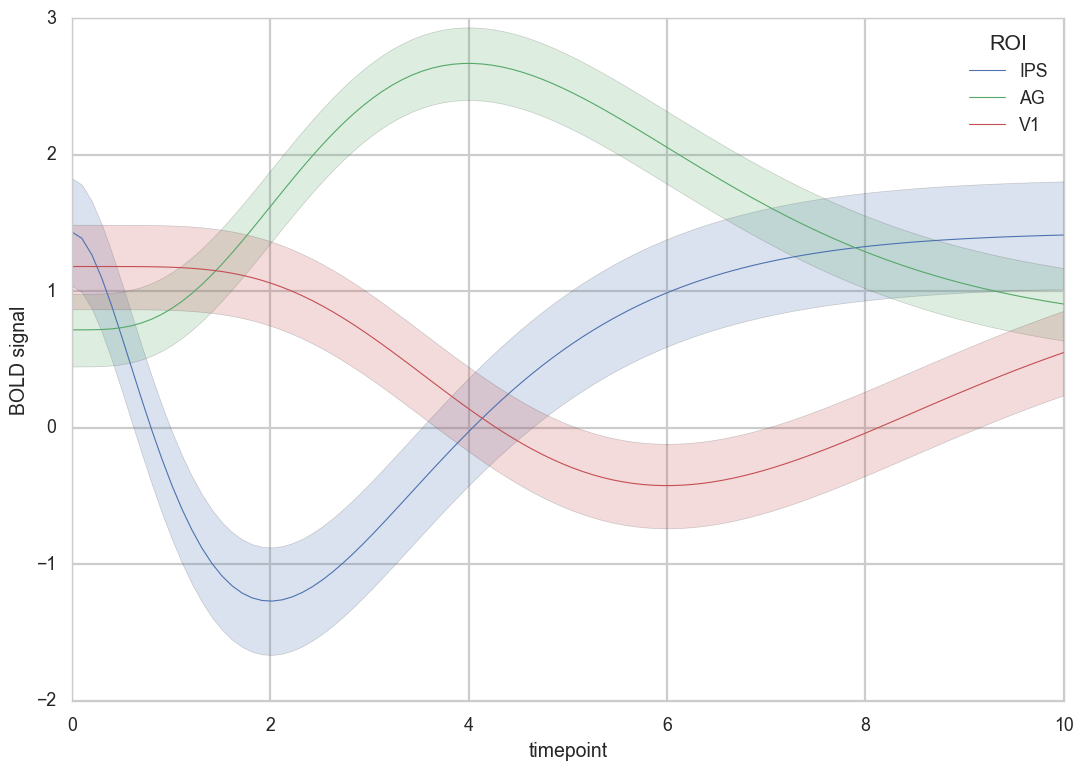

In [208]:
gammas = sns.load_dataset("gammas")
ax = sns.tsplot(time="timepoint", value="BOLD signal",
                 unit="subject", condition="ROI",
                 data=gammas)

(0, 27.0)

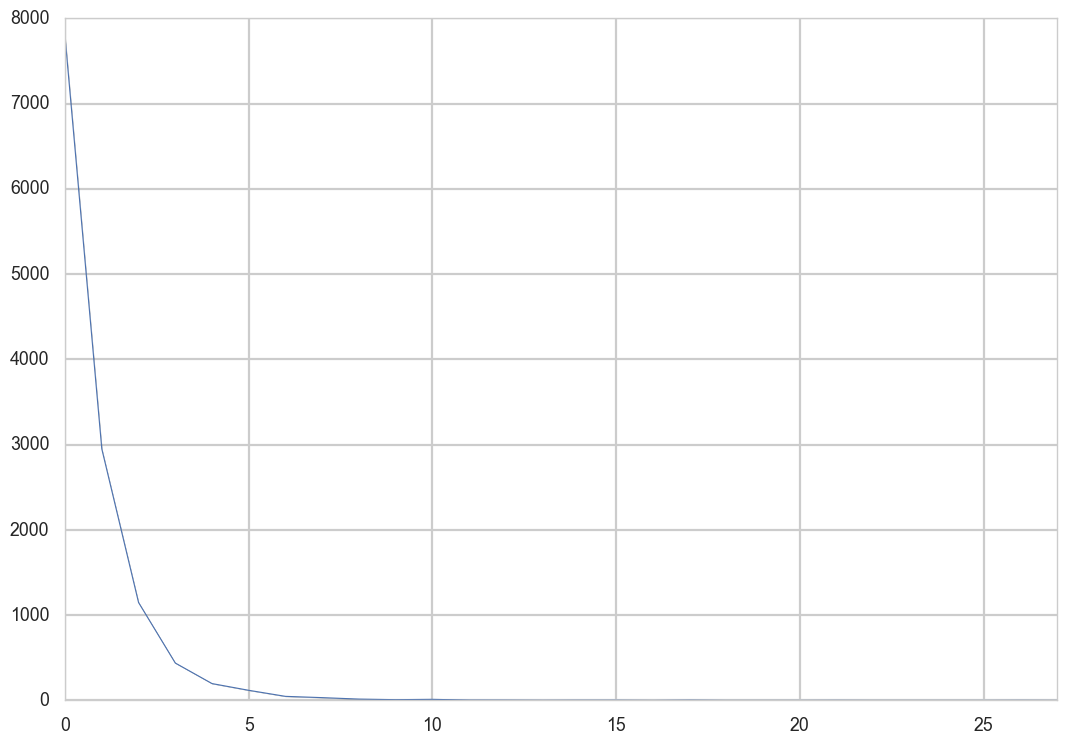

In [229]:
ax = sns.tsplot(data=tests_occurences_df.query("sample=='adrenal gland'")['occ'], estimator=np.mean)
ax.set_xlim(0,)

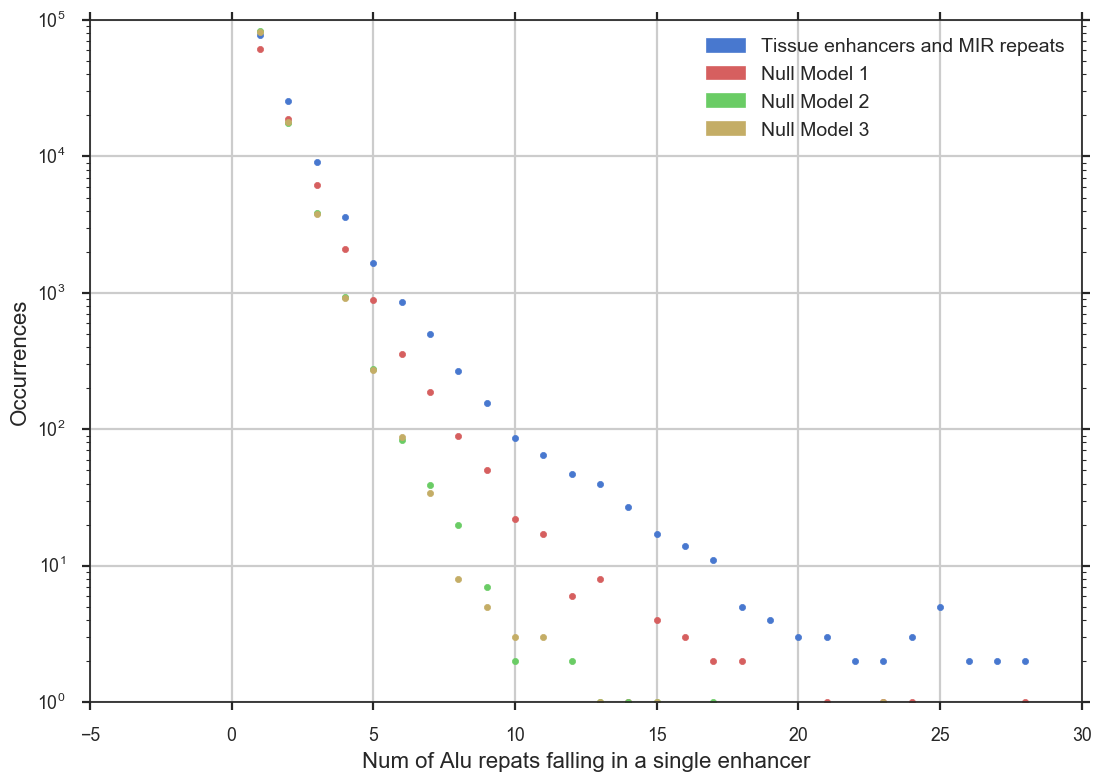

In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.patches as mpatches
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})

fig = plt.figure()
ax = fig.add_subplot(111)

g1 = plt.scatter(occ_base[:-1], occ_freq, color='b')
g2 = plt.scatter(occ_base[:-1], occ_freq_null, color='r')
g3 = plt.scatter(occ_base[:-1], occ_freq_null_2, color='g')
g4 = plt.scatter(occ_base[:-1], occ_freq_null_3, color='y')
#g5 = sns.pointplot(x=occ_base[:10], y=occ_freq_complement[:10], color='pink')
ax.axes.set_yscale('log')

ax.grid()

#sns.despine(offset=10, trim=True)

ax.set_ylabel('Occurrences', size=16)
ax.set_xlabel('Num of Alu repats falling in a single enhancer', size=16)

blue_patch = mpatches.Patch(color='b', label='Tissue enhancers and MIR repeats')
red_patch = mpatches.Patch(color='r', label='Null Model 1')
green_patch = mpatches.Patch(color='g', label='Null Model 2')
yellow_patch = mpatches.Patch(color='y', label='Null Model 3')

plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch], fontsize=14, loc=1)

In [48]:
encode_bed = BedTool().from_dataframe(
    encode_bed.to_dataframe()[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [49]:
overlap_occurences_df = encode_bed.intersect(repeat_bed, F=1, c=True).to_dataframe()
overlap_occurences_null_df = encode_bed.shuffle(g=assembly_path).intersect(repeat_bed, F=1, c=True).to_dataframe()
overlap_occurences_null_2_df = encode_bed.intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
overlap_occurences_null_3_df = encode_bed.shuffle(g=assembly_path).intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
overlap_occurences_complement_df = encode_bed.sort().complement(g=assembly_path).intersect(repeat_bed, F=1, c=True).to_dataframe()

In [50]:
occ_cols = ['chrom', 'start', 'end', 'name', 'score', 'strand', 'occurences']
overlap_occurences_df.columns = occ_cols
overlap_occurences_null_df.columns = occ_cols
overlap_occurences_null_2_df.columns = occ_cols
overlap_occurences_null_3_df.columns = occ_cols
overlap_occurences_complement_df.columns = ['chrom', 'start', 'end', 'occurences']

In [47]:
occurences = overlap_occurences_df.query("occurences > 0")['occurences'].tolist()
occurences_null = overlap_occurences_null_df.query("occurences > 0")['occurences'].tolist()
occurences_null_2 = overlap_occurences_null_2_df.query("occurences > 0")['occurences'].tolist()
occurences_null_3 = overlap_occurences_null_3_df.query("occurences > 0")['occurences'].tolist()
occurences_complement = overlap_occurences_complement_df.query("occurences > 0")['occurences'].tolist()

In [48]:
occ_freq, occ_base = np.histogram(occurences, bins=range(1,26))
occ_freq_null, _ = np.histogram(occurences_null, bins=range(1,26))
occ_freq_null_2, _ = np.histogram(occurences_null_2, bins=range(1,26))
occ_freq_null_3, _ = np.histogram(occurences_null_3, bins=range(1,26))
occ_freq_complement, _ = np.histogram(occurences_complement, bins=range(1,26))

occ_ratio = occ_freq / sum(occ_freq)
occ_ratio_null = occ_freq_null / sum(occ_freq_null)
occ_ratio_null_2 = occ_freq_null_2 / sum(occ_freq_null_2)
occ_ratio_null_3 = occ_freq_null_3 / sum(occ_freq_null_3)
occ_ratio_complement = occ_freq_complement / sum(occ_freq_complement)

[None]

/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


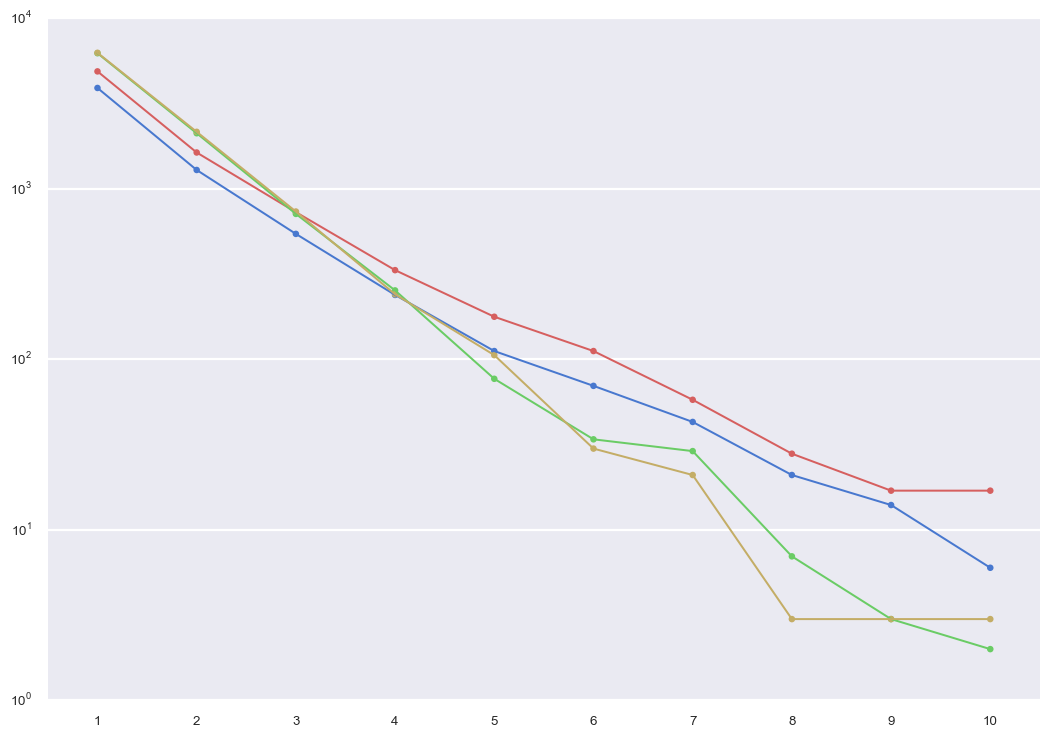

In [49]:
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline
#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})
sns.set_style("darkgrid")
g1 = sns.pointplot(x=occ_base[:10], y=occ_freq[:10], color='b')
g2 = sns.pointplot(x=occ_base[:10], y=occ_freq_null[:10], color='r')
g3 = sns.pointplot(x=occ_base[:10], y=occ_freq_null_2[:10], color='g')
g4 = sns.pointplot(x=occ_base[:10], y=occ_freq_null_3[:10], color='y')
#g5 = sns.pointplot(x=occ_base[:10], y=occ_freq_complement[:10], color='pink')
g1.set(yscale='log')

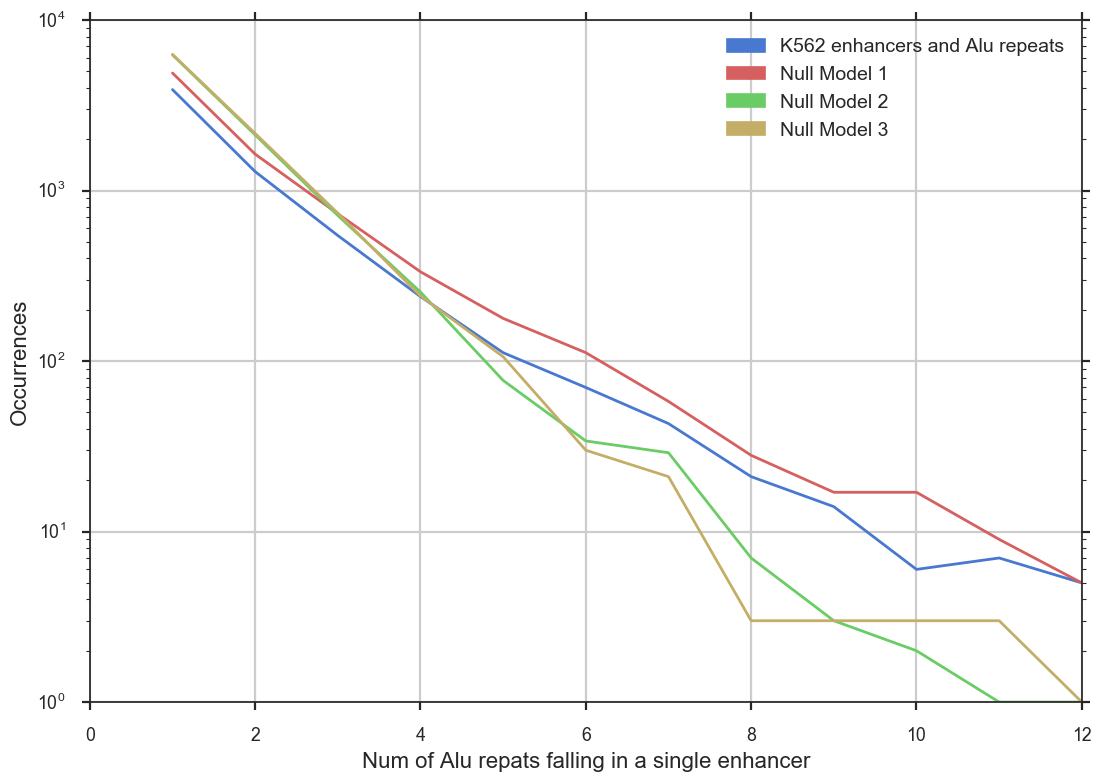

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.patches as mpatches
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})

fig = plt.figure()
ax = fig.add_subplot(111)

g1 = plt.plot(occ_base[:12], occ_freq[:12], color='b')
g2 = plt.plot(occ_base[:12], occ_freq_null[:12], color='r')
g3 = plt.plot(occ_base[:12], occ_freq_null_2[:12], color='g')
g4 = plt.plot(occ_base[:12], occ_freq_null_3[:12], color='y')
#g5 = sns.pointplot(x=occ_base[:10], y=occ_freq_complement[:10], color='pink')
ax.axes.set_yscale('log')

ax.grid()

#sns.despine(offset=10, trim=True)

ax.set_ylabel('Occurrences', size=16)
ax.set_xlabel('Num of Alu repats falling in a single enhancer', size=16)

blue_patch = mpatches.Patch(color='b', label='K562 enhancers and Alu repeats')
red_patch = mpatches.Patch(color='r', label='Null Model 1')
green_patch = mpatches.Patch(color='g', label='Null Model 2')
yellow_patch = mpatches.Patch(color='y', label='Null Model 3')

plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch], fontsize=14, loc=1)

In [46]:
import scipy.stats as st
print(st.expon.fit(occ_freq[:10]))
print(st.expon.fit(occ_freq_null[:10]))
print(st.expon.fit(occ_freq_null_2[:10]))
print(st.expon.fit(occ_freq_null_3[:10]))

(5.9999999999810854, 619.30000415560414)
(13.999999999977749, 786.80005911623766)
(1.999999999990602, 943.00007570431035)
(0.99999999998651301, 956.40000544818349)


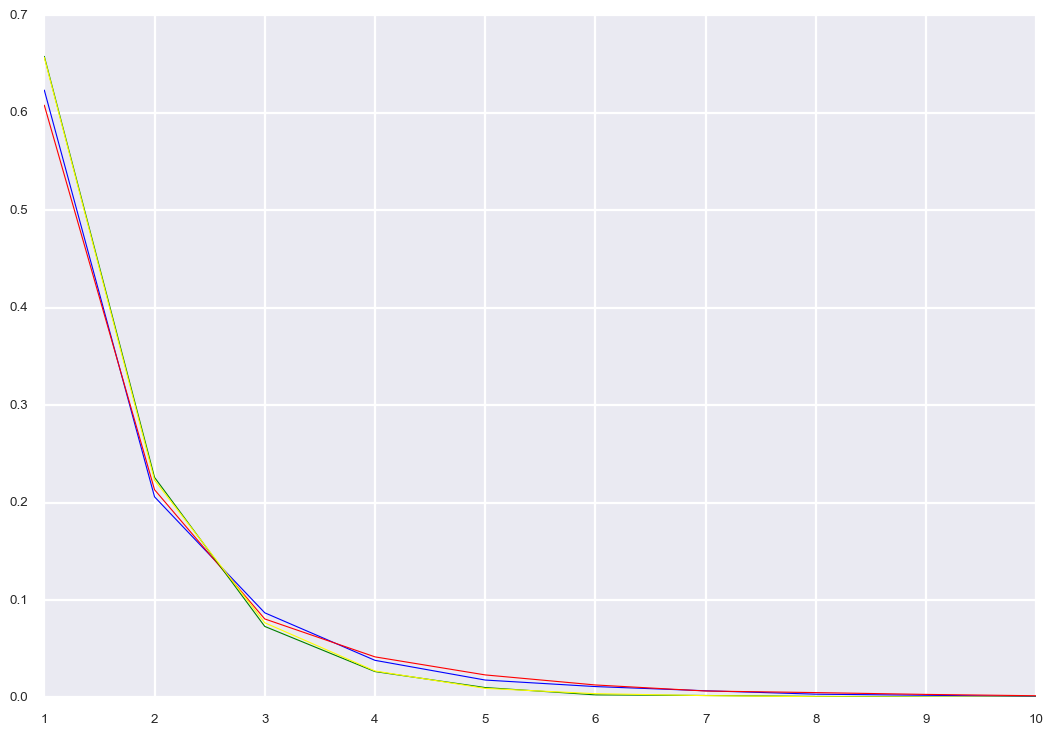

In [47]:
# ratios normalized
import matplotlib.pyplot as plt
plt.plot(occ_base[:10], occ_ratio[:10], c='blue')
plt.plot(occ_base[:10], occ_ratio_null[:10], c='red')
plt.plot(occ_base[:10], occ_ratio_null_2[:10], c='green')
ax = plt.plot(occ_base[:10], occ_ratio_null_3[:10], c='yellow')
#plt.plot(occ_base[:10], occ_ratio_complement[:10], c='pink')

plt.show()


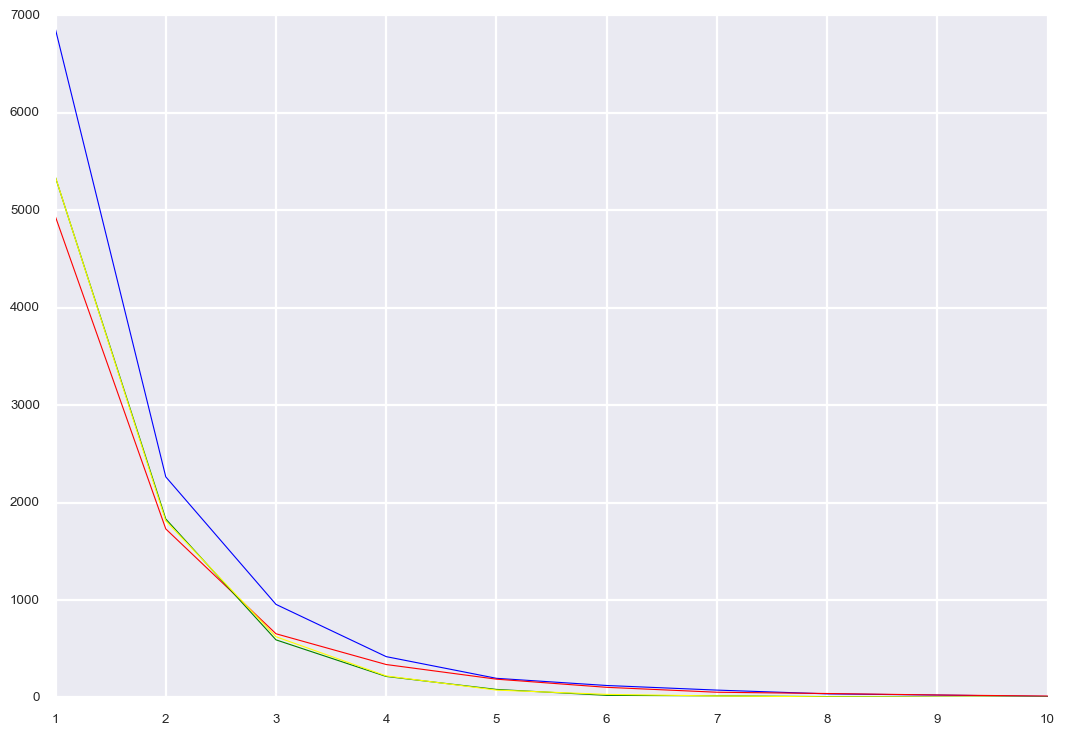

In [48]:
# ratios normalized adjusted (with overlap count)
import matplotlib.pyplot as plt
plt.plot(occ_base[:10], occ_ratio[:10]*real_count, c='blue')
plt.plot(occ_base[:10], occ_ratio_null[:10]*8112, c='red')
plt.plot(occ_base[:10], occ_ratio_null_2[:10]*8108, c='green')
plt.plot(occ_base[:10], occ_ratio_null_3[:10]*8125, c='yellow')
#plt.plot(occ_base[:10], occ_ratio_complement[:10], c='pink')

plt.show()


## Closeness distribution

In [49]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
%matplotlib inline
import numpy as np
from joblib import Parallel, delayed
import multiprocessing

def compute_centers(closeness_df):
    closeness_df['centered_locus'] = round(
        (closeness_df['end'] - closeness_df['start'])/2 
        + closeness_df['start']).astype(int)

    closeness_df['close_centered_locus'] = round(
        (closeness_df['close_end'] - closeness_df['close_start'])/2 
        + closeness_df['close_start']).astype(int)

    closeness_df['centered_distance'] = closeness_df['close_centered_locus'] - closeness_df['centered_locus'] 
    return closeness_df

def compute_closeness_df(sorted_bed, sorted_bed_with):
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                     'close_chrom', 'close_start','close_end', 
                     'close_name', 'close_score', 'close_strand', 'distance']
    closeness = sorted_bed.closest(sorted_bed_with, D='a')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    return closeness_df

def build_closeness_df(bed, bed_with):
    
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                         'close_chrom', 'close_start','close_end', 
                         'close_name', 'close_score', 'close_strand', 'distance']
    
    sorted_bed = bed.sort()
    sorted_bed_with = bed_with.sort()
    
    # real on real
    closeness = sorted_bed.closest(sorted_bed_with, D='a', t='all')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    
    return closeness_df

In [50]:
encode_bed = BedTool().from_dataframe(
    encode_bed.to_dataframe()[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [51]:
repeat_closeness_df = build_closeness_df(encode_bed, repeat_bed)

(-5000, 5000)

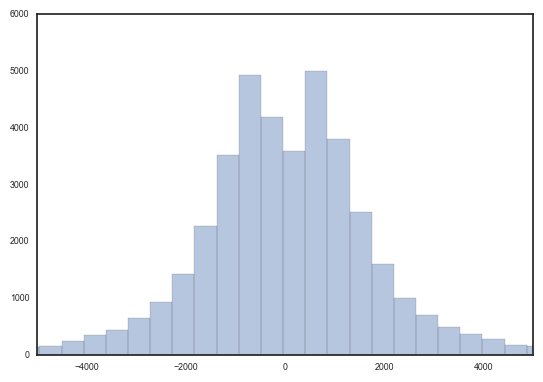

In [76]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_df[['centered_distance']], kde=False, bins=1000)
g1.set_xlim(-5000, 5000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 1 Closeness

In [53]:
encode_bed_shuffled = encode_bed.shuffle(g=assembly_path)
repeat_closeness_null_df = build_closeness_df(encode_bed_shuffled, repeat_bed)

(-300000, 300000)

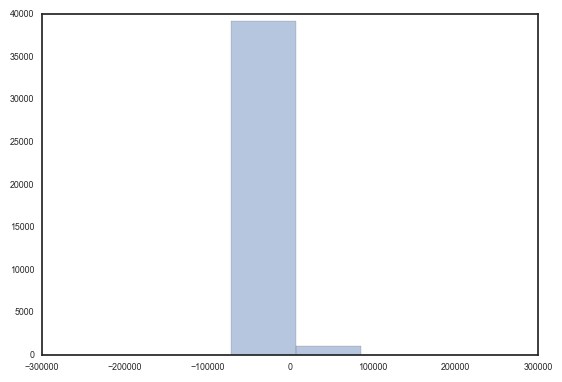

In [67]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null_df[['centered_distance']], kde=False, bins=1000)
g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 2 Closeness

In [55]:
repeat_bed_shuffled = repeat_bed.shuffle(g=assembly_path)
repeat_closeness_null2_df = build_closeness_df(encode_bed, repeat_bed_shuffled)

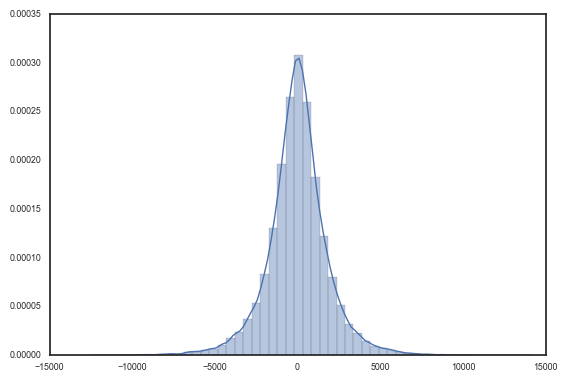

In [56]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null2_df[['centered_distance']], kde=True)
#g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 3 Closeness

In [57]:
repeat_closeness_null3_df = build_closeness_df(encode_bed_shuffled, repeat_bed_shuffled)

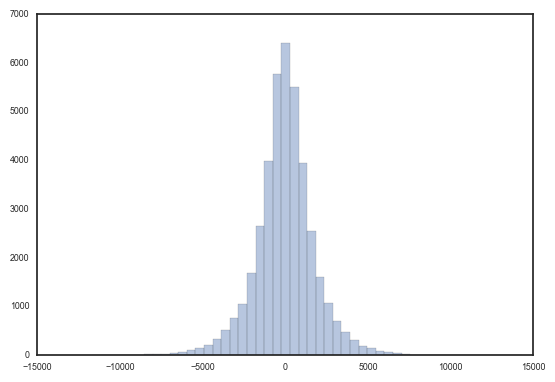

In [58]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null3_df[['centered_distance']], kde=False)
#g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Comparing Closeness Distributions

In [59]:
centered_distance_distribution = repeat_closeness_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null = repeat_closeness_null_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null_2 = repeat_closeness_null2_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null_3 = repeat_closeness_null3_df.query("centered_distance >=0")['centered_distance']

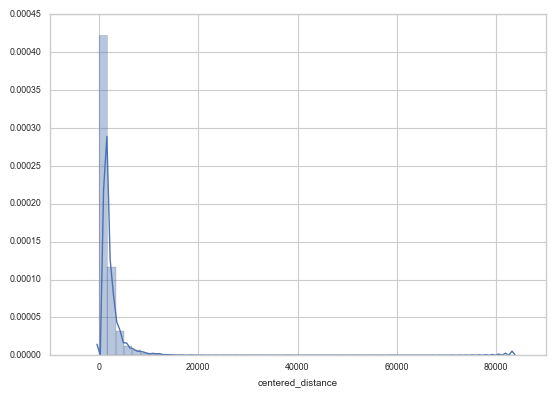

In [60]:
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(centered_distance_distribution, kde=True)
#g1.set_xlim(0, 10000)

In [77]:
freqs, base = np.histogram(centered_distance_distribution, bins=3000)
freqs_null, base_null = np.histogram(centered_distance_distribution_null, bins=base)
freqs_null_2, base_null_2 = np.histogram(centered_distance_distribution_null_2, bins=base)
freqs_null_3, base_null_3 = np.histogram(centered_distance_distribution_null_3, bins=base)

In [78]:
cumulative = np.cumsum(freqs) /sum(freqs)
cumulative_null = np.cumsum(freqs_null) / sum(freqs_null)
cumulative_null_2 = np.cumsum(freqs_null_2) / sum(freqs_null_2)
cumulative_null_3 = np.cumsum(freqs_null_3) / sum(freqs_null_3)

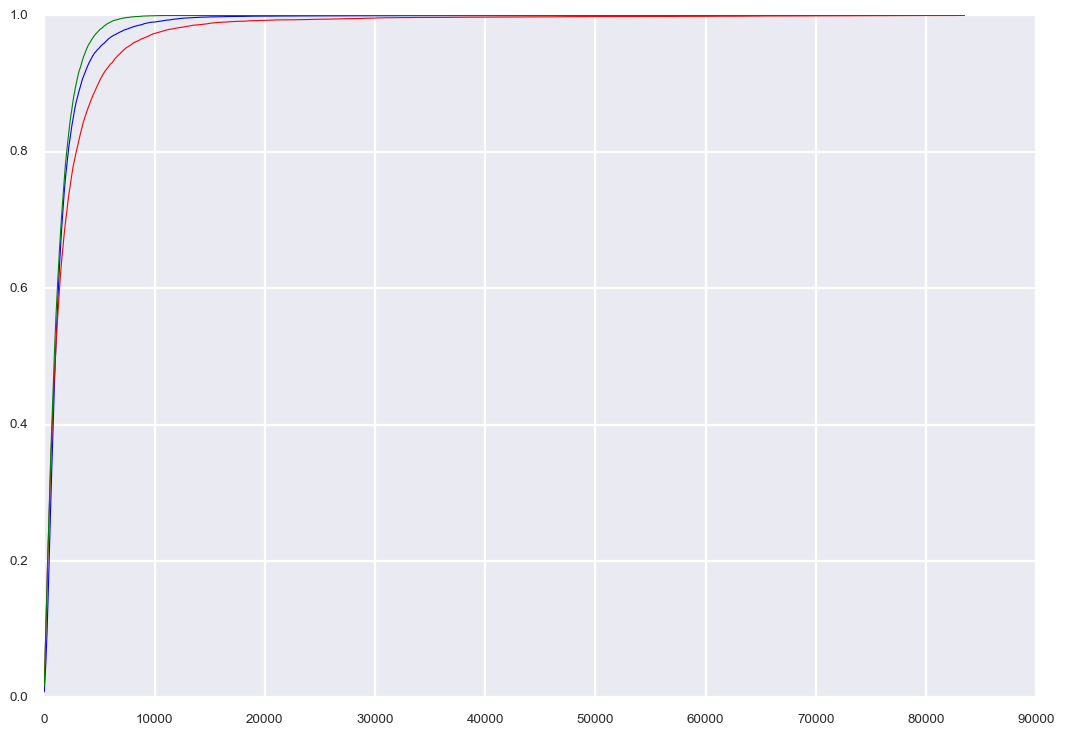

In [79]:
import matplotlib.pyplot as plt
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})
sns.set_style("darkgrid")

plt.plot(base[:-1], cumulative, c='blue')
plt.plot(base_null[:-1], cumulative_null, c='red')
plt.plot(base_null_2[:-1], cumulative_null_2, c='green')
#plt.plot(base_null_3[:-1], cumulative_null_3, c='yellow')
plt.show()


## Densities

In [ ]:
# density
# assuming expected number of MIR-enhancers as
# average genome-wide density of enhancers (enhancers/bp) * total bp length of all MIRs

def compute_expected_number(name1_bed_df, name2_bed_df, name1, name2):
    genome_size = 3095677412
    #enhancers_bed_df['size'] = enhancers_bed_df['end'] - enhancers_bed_df['start']
    name1_density = len(name1_bed_df) /  genome_size
    name2_bed_df['size'] = name2_bed_df['end'] - name2_bed_df['start']
    name2_len = name2_bed_df['size'].sum()
    print(name1, 'density =', name1_density, '(num of intervals)/(genome bp)')
    print(name2,'length =', name2_len, 'bp')
    print('Expected number of', name2, name1, '=', int(round(name1_density * name2_len)))

In [ ]:
compute_expected_number(encode_bed_df, repeat_bed_df, 'K562 enhancers', 'Sine/MIR')

In [ ]:
def infer_TSS_proximity(row):
    description = row['name']
    if 'Distal' in description:
        return 'Distal'
    if 'Proximal' in description:
        return 'Proximal'

In [ ]:
encode_bed_df['TSS_proximity'] = encode_bed_df.apply(lambda r: infer_TSS_proximity(r), axis=1)

In [ ]:
proximal_df = encode_bed_df.query("TSS_proximity == 'Proximal'")
distal_df = encode_bed_df.query("TSS_proximity == 'Distal'")

In [ ]:
len(distal_df)

In [ ]:
len(proximal_df)

In [ ]:
compute_expected_number(distal_df, repeat_bed_df, "Distal enhancers", "Sine/MIR")

In [ ]:
compute_expected_number(proximal_df, repeat_bed_df, "Proximal enhancers", "Sine/MIR")

In [ ]:
genes_bed = BedTool("../download/genome/knownGene_hg19.bed")

In [ ]:
genes_bed.count()

In [ ]:
genes_bed_df = genes_bed.to_dataframe()

In [ ]:
chrom_list = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
              'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
              'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
              'chr22', 'chr21']

genes_bed_df = genes_bed_df.query("chrom in @chrom_list")

In [ ]:
genes_bed_df['chrom'].unique()

In [ ]:
genes_bed = BedTool().from_dataframe(genes_bed_df)

In [ ]:
genes_bed.count()

In [ ]:
compute_expected_number(genes_bed_df, repeat_bed_df, 'Genes', 'Sine/MIR')

In [ ]:
# genic enhancers: enhancers in genic regions
genic_enhancers_bed = encode_bed.intersect(genes_bed, f=1, u=True)

In [ ]:
genic_enhancers_bed.count()

In [ ]:
# genic non-enhancers: genic regions without enhancers
genic_non_enhancers_bed = genes_bed.subtract(genic_enhancers_bed, A=True)

In [ ]:
genic_non_enhancers_bed.intersect(genic_enhancers_bed).count()

In [ ]:
# non-genic enhancers: enhancers outside genic regions
non_genic_enhancers_bed = encode_bed.subtract(genes_bed, f=1, A=True)

In [ ]:
non_genic_enhancers_bed.count()

In [ ]:
non_genic_enhancers_bed.count() + genic_enhancers_bed.count() == encode_bed.count()

In [ ]:
# 200 bp regions around core of enhancers
enhancers_regions_bed = encode_bed_cores.slop(g=assembly_path, b=200)

In [ ]:
enhancers_regions_bed.count()

In [ ]:
genes_bed_df['size'] = genes_bed_df.apply(lambda row: compute_size(row), axis=1)

In [ ]:
genes_bed_df[['size']].quantile(np.arange(0,1,0.1))

In [ ]:
def compute_density_region(bed_in_region_df, region_df):
    region_size = region_df['size'].sum()
    bed_in_region_size = bed_in_region_df['size'].sum()
    
    return bed_in_region_size / region_size

In [ ]:
repeat_reg1_df = repeat_bed.intersect(genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg2_df = repeat_bed.intersect(genic_non_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg3_df = repeat_bed.intersect(non_genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg4_df = repeat_bed.intersect(enhancers_regions_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
reg1_df = genic_enhancers_bed.to_dataframe()
reg2_df = genic_non_enhancers_bed.to_dataframe()
reg3_df = non_genic_enhancers_bed.to_dataframe()
reg4_df = enhancers_regions_bed.to_dataframe()

reg1_df['size'] =  reg1_df.apply(lambda row: compute_size(row), axis=1)
reg2_df['size'] =  reg2_df.apply(lambda row: compute_size(row), axis=1)
reg3_df['size'] =  reg3_df.apply(lambda row: compute_size(row), axis=1)
reg4_df['size'] =  reg4_df.apply(lambda row: compute_size(row), axis=1)

repeat_reg1_df['size'] = repeat_reg1_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg2_df['size'] = repeat_reg2_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg3_df['size'] = repeat_reg3_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg4_df['size'] = repeat_reg4_df.apply(lambda row: compute_size(row), axis=1)

In [ ]:
d1 = compute_density_region(repeat_reg1_df,reg1_df)
d2 = compute_density_region(repeat_reg2_df,reg2_df)
d3 = compute_density_region(repeat_reg3_df,reg3_df)
d4 = compute_density_region(repeat_reg4_df,reg4_df)

print("density of MIR in genic enhancers", d1)
print("density of MIR in genic non enhancers", d2)
print("density of MIR in non genic enhancers", d3)
print("density of MIR in enhancer regions", d4)

sum_d = d1+d2+d3+d4

print("Normalized Ratios",d1/sum_d, d2/sum_d, d3/sum_d, d4/sum_d)
